<a href="https://colab.research.google.com/github/matpazikas/Apostila_CognitiveComputing/blob/main/material/aulas/PDI/lab06/Transformada-Hough-morfologia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objetivos da aula:**

*   Conhecer e praticar a Transformada de Hough para linhas e circulos
*   conhecer e praticar com os operadores de dilatação e erosão
*   conhecer e praticar com os operadores de abertura e fechamento

In [2]:
## Vou fazer o download das imagens do laboratório diretamente do repositório para ficar mais facil....

import requests
import os

# Define o laboratório
laboratorio = 'lab06'  ### altere para o laboratório desejado
diretorio = 'lab_images'  ### altere para o diretório que deseja salvar as imagens

# Download de um arquivo
def download_file(url, destination):
    response = requests.get(url, stream=True)
    if response.status_code == 200:
        with open(destination, 'wb') as file:
            for chunk in response.iter_content(chunk_size=8192):
                file.write(chunk)
        print(f"Baixado: {destination}")
    else:
        print(f"Erro ao baixar {url}")

# Monta a URL completa
api_url = "https://api.github.com/repos/arnaldojr/cognitivecomputing/contents/material/aulas/PDI/"
url_completa = api_url + laboratorio
print(f"Fazendo o download de: {url_completa}")

# checa se a URL está acessível
response = requests.get(url_completa)
if response.status_code != 200:
    raise Exception(f"Erro ao acessar o repositório: {response.status_code}")
files = response.json()


# Faz o download de cada arquivo
os.makedirs(diretorio, exist_ok=True) # Cria a pasta downloads
for file in files:
    file_name = file['name']
    if file_name.endswith(('.png', '.jpg', '.jpeg', '.mp4')):  # Adicione mais extensões se necessário
        file_url = file['download_url']
        destination = os.path.join(diretorio, file_name)
        download_file(file_url, destination)

print(f"Download concluído. Arquivos salvos na pasta {diretorio}.")

Fazendo o download de: https://api.github.com/repos/arnaldojr/cognitivecomputing/contents/material/aulas/PDI/lab06
Baixado: lab_images/coins.png
Baixado: lab_images/corredor.png
Baixado: lab_images/formas.png
Baixado: lab_images/formas_contorno.png
Baixado: lab_images/formas_contornor.png
Baixado: lab_images/holes.png
Baixado: lab_images/j-noise.png
Baixado: lab_images/j.png
Baixado: lab_images/melancia_filtrada.png
Baixado: lab_images/melancia_filtrada_rgb.png
Baixado: lab_images/moeda1.jpg
Baixado: lab_images/people-walking.mp4
Baixado: lab_images/rua.png
Baixado: lab_images/sala.jpg
Baixado: lab_images/sala1.jpg
Baixado: lab_images/sala2.jpg
Baixado: lab_images/sala3.jpg
Baixado: lab_images/sala_res.png
Download concluído. Arquivos salvos na pasta lab_images.


## Transformada de Hough

A Transformada de Hough é uma técnica poderosa para detecção de padrões geométricos em imagens, como linhas e círculos. Esta técnica é particularmente útil quando:

- Os padrões estão parcialmente oclusos ou fragmentados
- Há ruído significativo na imagem
- Existem outros objetos ou características na imagem

A transformada funciona mapeando pontos da imagem para um espaço de parâmetros, onde os padrões podem ser identificados como picos em um acumulador.

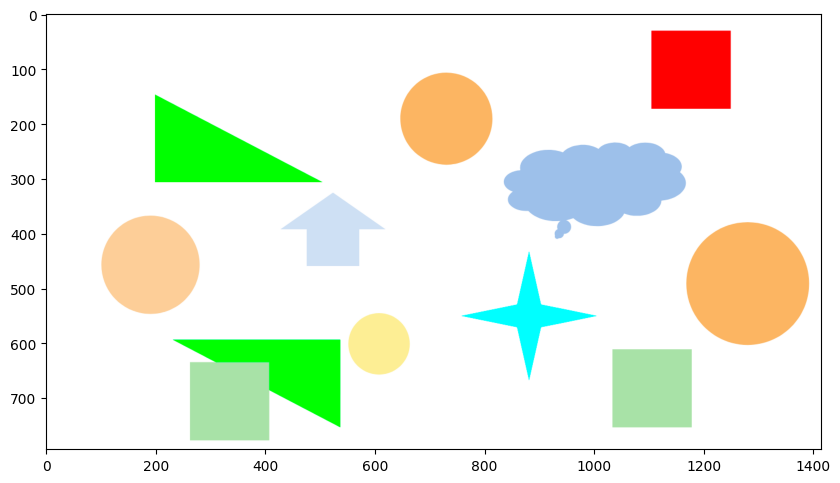

In [4]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread('lab_images/formas.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (10,10))
plt.imshow(img); plt.show()

### **DETECÇÃO DE CIRCULOS**


Vamos fazer a deteção de circulos da imagem forma.

[[[1281.   493.   111.8]
  [ 609.   601.    55.8]
  [ 733.   189.    85.4]
  [ 187.   459.    87.2]
  [1273.   487.   119.2]
  [1285.   483.   119.8]
  [ 197.   453.    95.8]
  [ 725.   197.    90.6]
  [1269.   497.   123.2]
  [1279.   503.   102. ]
  [1293.   501.   125.8]
  [1293.   491.   100.4]
  [ 723.   183.    75.2]
  [ 183.   447.    78.4]]]


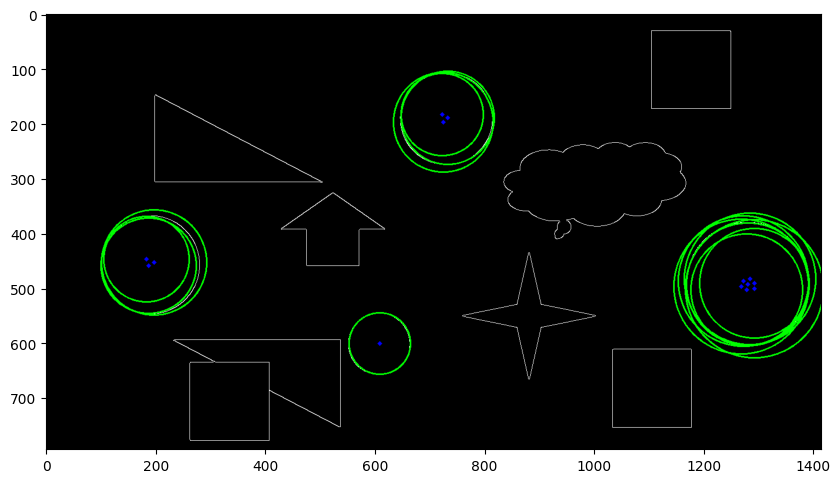

In [6]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(img_gray,50,150)

"""
Detecta círculos em uma imagem usando a Transformada de Hough

Parâmetros:
imagem (ndarray): Imagem de entrada
dp (float): Resolução do acumulador
minDist (int): Distância mínima entre os centros dos círculos detectados
param1 (int): Limiar superior para o detector de bordas Canny
param2 (int): Limiar do acumulador para centros de círculos
minRadius (int): Raio mínimo dos círculos
maxRadius (int): Raio máximo dos círculos

Retorno:
ndarray: Imagem com círculos detectados
"""
circles=cv2.HoughCircles(edges,cv2.HOUGH_GRADIENT,dp=2,minDist=10,param1=200,param2=100,minRadius=5,maxRadius=150)

bordas_rgb = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)
output = bordas_rgb

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        # desenha o contorno do circulo
        cv2.circle(output,(i[0],i[1]),i[2],(0,255,0),2)
        # desenha no centro do circulo
        cv2.circle(output,(i[0],i[1]),2,(0,0,255),3)

plt.figure(figsize = (10,10))
plt.imshow(output, cmap="Greys_r", vmin=0, vmax=255); plt.show()

### Parâmetros da Transformada de Hough para Círculos

O resultado não ficou bom, pois há muitos falsos positivos detectados, neste caso precisamos alterar os parametros da transformada de hough.

Vamos ver o que é cada um deles.


#### **Sintaxe:**

`
circles=cv2.HoughCircles(image,method=cv2.HOUGH_GRADIENT,dp,minDist,param1,param2,minRadius,maxRadius)
`

#### **Parâmetros:**
- **dp**: Relação entre o tamanho da imagem e o tamanho do acumulador. Um valor maior de dp detecta bordas mais tênues.
- **minDist**: Distância mínima entre os centros dos círculos detectados.
- **param1**: Valor do gradiente usado para detecção de bordas (limiar superior para o detector Canny).
- **param2**: Limiar do acumulador. Valores mais baixos detectam mais círculos (incluindo falsos positivos).
- **minRadius**: Raio mínimo dos círculos a serem detectados (em pixels).
- **maxRadius**: Raio máximo dos círculos a serem detectados (em pixels).

### DESAFIO 1

Faça a alteração dos parametros para a transformada de Hough afim de detectar apenas os circulos da imagem.

Dica: Altere um parametro por vez e analise o resultado.

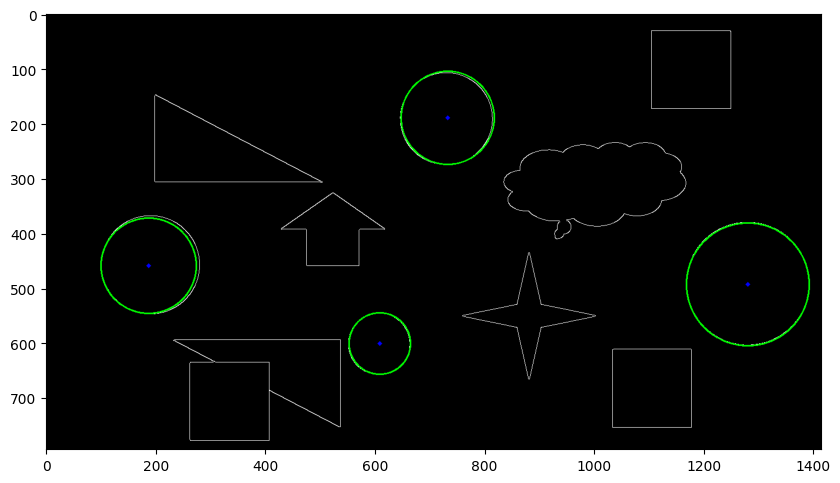

In [39]:
# Implemente sua solução aqui...

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(img_gray,50,150)

circles=cv2.HoughCircles(edges,cv2.HOUGH_GRADIENT,dp=2,minDist=110,param1=200,param2=110,minRadius=50,maxRadius=120)

bordas_rgb = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)
output = bordas_rgb

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        # desenha o contorno do circulo
        cv2.circle(output,(i[0],i[1]),i[2],(0,255,0),2)
        # desenha no centro do circulo
        cv2.circle(output,(i[0],i[1]),2,(0,0,255),3)

plt.figure(figsize = (10,10))
plt.imshow(output, cmap="Greys_r", vmin=0, vmax=255); plt.show()


### DESAFIO 2

Desenvolva um pipeline de processamento digital de imagens incluindo Transformada de Hough Circles para detectar moedas espalhadas sobre mesa. Note que o seu sistema deve ser capaz de diferenciar o valor da moeda por sua dimensão e contar quantas imagens de cada valor estão expostas.

![](https://github.com/arnaldojr/cognitivecomputing/blob/master/material/aulas/PDI/lab06/coins.png?raw=1)

Contagem de moedas por valor: {'1': 3, '5': 5, '10': 1, '25': 0}


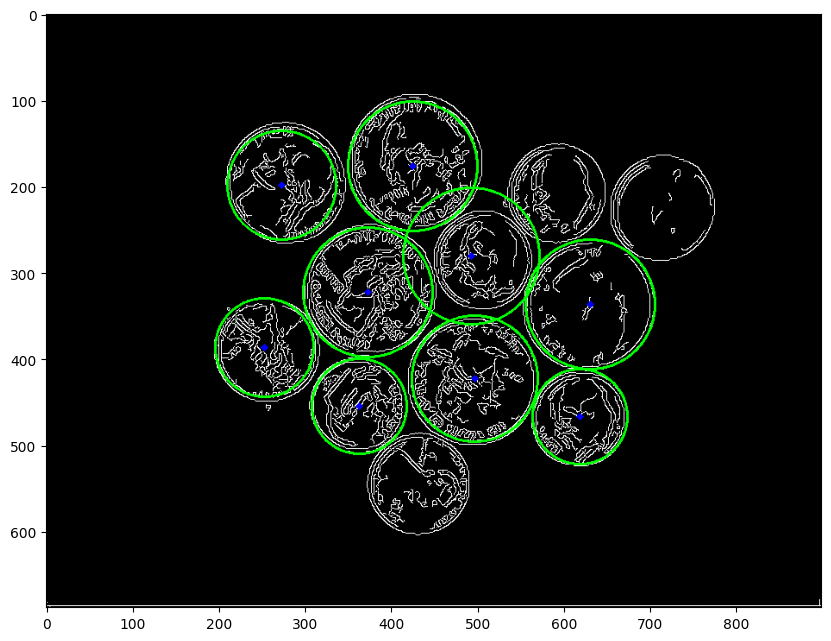

In [67]:
#Implemente seu código

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Função para detectar e contar moedas
def detectar_moedas(img):
    # Converter a imagem para escala de cinza
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Aplicar filtro de Canny para bordas
    edges = cv2.Canny(img_gray, 50, 150)

    # Detectar círculos usando Hough Transform
    circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, dp=2, minDist=120,
                                param1=50, param2=220, minRadius=20, maxRadius=120)

    # Converter bordas para RGB para visualização
    bordas_rgb = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)
    output = bordas_rgb

    # Verificar se círculos foram detectados
    if circles is not None:
        circles = np.uint16(np.around(circles))

        # Dicionário para contagem de moedas por valor (com base no raio)
        contagem = {
            "1": 0,  # Exemplo para moedas de 1 unidade
            "5": 0,  # Exemplo para moedas de 5 unidades
            "10": 0, # Exemplo para moedas de 10 unidades
            "25": 0  # Exemplo para moedas de 25 unidades
        }

        for i in circles[0, :]:
            x, y, r = i[0], i[1], i[2]

            # Desenhar o círculo detectado
            cv2.circle(output, (x, y), r, (0, 255, 0), 2)  # Círculo em verde
            # Desenhar o centro do círculo
            cv2.circle(output, (x, y), 2, (0, 0, 255), 3)  # Centro em vermelho

            # Classificar as moedas com base no raio (pode ser ajustado conforme necessário)
            if 50 <= r <= 60:
                contagem["1"] += 1
            elif 61 <= r <= 75:
                contagem["5"] += 1
            elif 76 <= r <= 90:
                contagem["10"] += 1
            elif 91 <= r <= 120:
                contagem["25"] += 1

        # Exibir as contagens
        print(f"Contagem de moedas por valor: {contagem}")

    return output, contagem

# Carregar a imagem (substitua pelo caminho da sua imagem)
img = cv2.imread('lab_images/coins.png')

# Detectar as moedas
output, contagem = detectar_moedas(img)

# Exibir a imagem com as detecções
plt.figure(figsize=(10, 10))
plt.imshow(output, cmap="Greys_r", vmin=0, vmax=255)
plt.show()




### **DETECÇÃO DE RETAS**

A detecção de retas pode ser realizada utilizando a **Transformada de Hough para Linhas**, implementada nas funções **cv2.HoughLines()** e **cv2.HoughLinesP()**. A versão probabilística (**HoughLinesP**) melhora a estimativa das linhas detectadas ao considerar apenas pontos significativos.

#### **Sintaxe:**
```python
cv2.HoughLinesP(image, rho, theta, threshold, minLineLength=None, maxLineGap=None)
```

#### **Parâmetros:**
- **image**: Imagem de entrada em escala de cinza.
- **rho**: Resolução da distância no acumulador, em pixels.
- **theta**: Resolução angular no acumulador, em radianos (normalmente 1 grau = π/180).
- **threshold**: Limiar mínimo de votos no acumulador para validar uma linha.
- **minLineLength**: Comprimento mínimo para considerar um segmento como linha.
- **maxLineGap**: Distância máxima entre pontos para serem considerados na mesma linha.

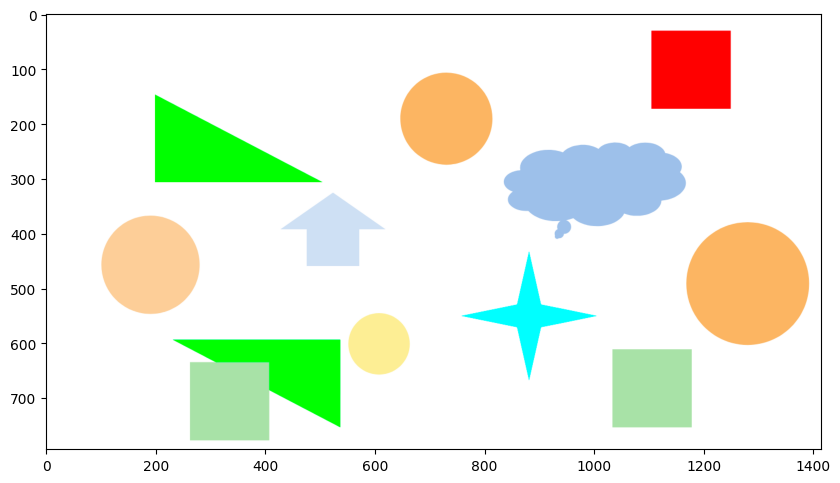

In [ ]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math

img = cv2.imread('formas.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (10,10))
plt.imshow(img); plt.show()

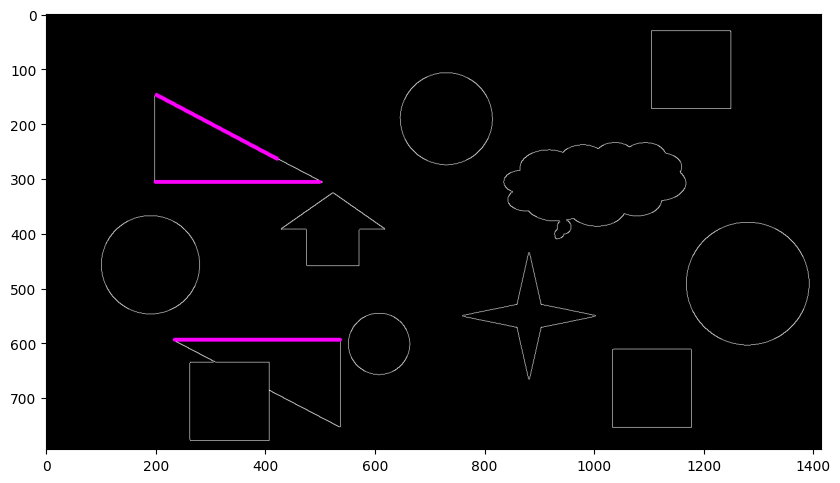

In [ ]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(img_gray,50,150)


lines = cv2.HoughLinesP(edges, 1, np.pi/180, 200, minLineLength=100, maxLineGap=10)

hough_img_rgb = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(hough_img_rgb, (x1, y1), (x2, y2), (255, 0, 255), 5)


plt.figure(figsize = (10,10))
plt.imshow(hough_img_rgb); plt.show()

### DESAFIO 3

Faça a alteração dos parametros para a transformada de Hough afim de detectar **todas** as linhas da imagem.

Dica: Altere um parametro por vez e analise o resultado.

In [ ]:
#Implemente seu código






### Transformada de Hough e Filtragem por Ângulo

Para aplicações avançadas, podemos filtrar os resultados com base no **ângulo das linhas detectadas**.

## Cálculo do Ângulo de uma Reta

A Transformada de Hough detecta **linhas retas** identificando pontos alinhados em uma imagem de bordas. Cada linha detectada é representada por dois pontos:

- $ (x_1, y_1) $ - Primeiro ponto da linha
- $ (x_2, y_2) $ - Segundo ponto da linha

A partir desses pontos, podemos calcular o **ângulo da linha** usando a seguinte fórmula:

Cada linha detectada em `HoughLinesP` é representada por dois pontos $(x_1, y_1)$ e $(x_2, y_2)$. O **ângulo $\theta$**  da reta pode ser calculado com:

$$
\theta = \arctan \left( \frac{y_2 - y_1}{x_2 - x_1} \right)
$$

Para converter para graus:

$$
\theta_{graus} = \theta \times \frac{180}{\pi}
$$

## Filtro de Linhas por Ângulo
Podemos definir um intervalo de ângulos desejado para filtrar as linhas:

- **Linhas verticais**: $\theta \approx 90^\circ$
- **Linhas horizontais**: $\theta \approx 0^\circ$ ou $180^\circ$
- **Linhas inclinadas**: qualquer outro intervalo necessário.


### pseudocódigo

```python
    for line in lines:
        x1, y1, x2, y2 = line[0]
        
        # Calcular o ângulo da linha
        angle_radianos = np.arctan2(y2 - y1, x2 - x1)
        angle_graus = np.degrees(angle_radianos)

    
```

### DESAFIO 4

![](https://github.com/arnaldojr/cognitivecomputing/blob/master/material/aulas/PDI/lab06/rua.png?raw=1)

Você recebeu a imagem de uma rodovia e precisa detectar as **linhas das faixas de trânsito** usando técnicas de processamento de imagem com a **Transformada de Hough**.

Note que o seu sistema deve ser inteligente o suficiente para detectar **apenas as faixas de trânsito**, ignorando outros segmentos de reta que possam aparecer na imagem. Para isso, será necessário um pipeline de processamento de imagem adequado. Crie e aplique uma máscara para isolar a estrada.


In [ ]:
#Implemente seu código






## **MORFOLOGIA MATEMÁTICA**


A morfologia matemática é um conjunto de técnicas de processamento de imagens baseadas na teoria dos conjuntos. Estas operações são fundamentais para:

- Extração de componentes de imagens úteis para representação e descrição de formas
- Pré-processamento e pós-processamento em tarefas de visão computacional
- Filtragem, afinamento e poda de regiões

As operações morfológicas trabalham com dois elementos principais:
1. **Imagem**: Geralmente binária (0s e 1s) ou em escala de cinza
2. **Elemento Estruturante**: Uma pequena matriz que define como a operação afetará a imagem

## Operações Básicas

As duas operações fundamentais da morfologia matemática são:

- **Dilatação**: Expande as regiões claras (1s) da imagem
- **Erosão**: Reduz as regiões claras da imagem

A partir destas operações básicas, podemos criar operações compostas como:

- **Abertura**: Erosão seguida de dilatação (remove pequenos objetos)
- **Fechamento**: Dilatação seguida de erosão (preenche pequenos buracos)

#### <b>DILATAÇÃO BINÁRIA</b>

É uma transformação morfológica que combina dois conjuntos usando adição vetorial. Como o nome diz, o resultado será uma imagem “engordada”.

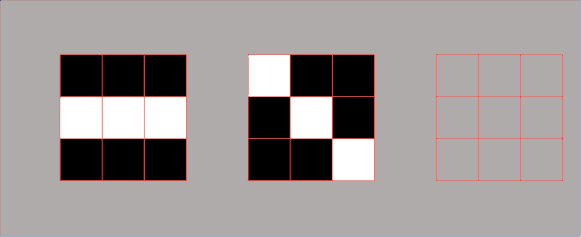

In [ ]:
from IPython.display import Image
Image(open('dilatação.gif','rb').read())

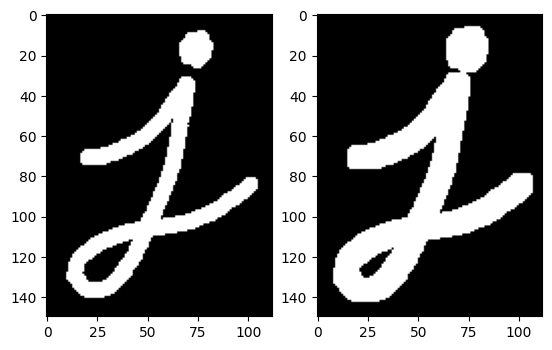

In [ ]:

img = cv2.imread('j.png',0)


kernel = np.ones((5,5),np.uint8)

dilation = cv2.dilate(img,kernel,iterations = 1)



plt.subplot(121),plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.subplot(122),plt.imshow(dilation, cmap="gray", vmin=0, vmax=255)
plt.show()

## Detectando contorno com dilatação

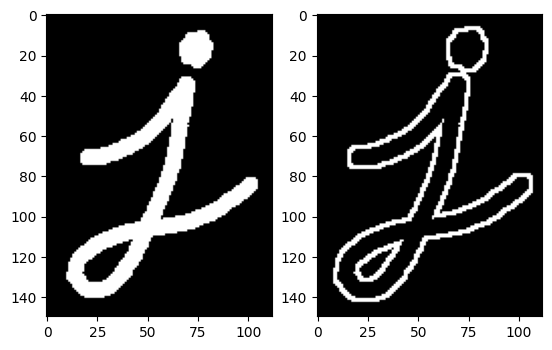

In [ ]:

img = cv2.imread('j.png',0)

dst = img.copy()
kernel = np.ones((5,5),np.uint8)

dilation = cv2.dilate(img,kernel,iterations = 1)

dst = dilation - img

plt.subplot(121),plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.subplot(122),plt.imshow(dst, cmap="gray", vmin=0, vmax=255)
plt.show()

# Elementos Estruturantes

## O que é um Elemento Estruturante?

O elemento estruturante (também chamado de kernel ou máscara) é uma matriz pequena que define como as operações morfológicas afetarão a imagem. Ele funciona como uma "sonda" que examina cada pixel da imagem e sua vizinhança para determinar o valor do pixel na imagem de saída.

Características importantes:
- Possui uma **origem** (ponto central)
- Tem uma **forma** específica (retângulo, círculo, cruz, etc.)
- Possui um **tamanho** que determina sua área de influência

## Importância do Elemento Estruturante

A escolha do elemento estruturante é impacta o resultado da operação morfológica:
- **Forma**: Influencia a direção e o padrão da transformação
- **Tamanho**: Determina a escala da transformação (objetos menores que o elemento estruturante podem ser removidos)
- **Orientação**: Pode ser usado para detectar características direcionais

### Dicas para escolher o Elemento Estruturante

**OpenCV oferece três formas básicas**:
- Retangular: `cv2.MORPH_RECT`
- Elíptico: `cv2.MORPH_ELLIPSE`
- Cruz: `cv2.MORPH_CROSS`

- **Retangular**: Bom para operações gerais, preserva bordas horizontais e verticais
- **Elíptico**: Produz resultados mais suaves, sem cantos acentuados
- **Cruz**: Preserva linhas finas horizontais e verticais

**Experimentação** é fundamental para encontrar o elemento estruturante ideal para cada aplicação

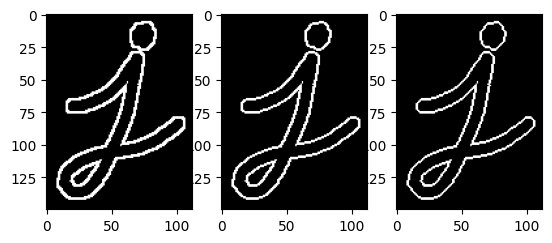

In [ ]:

img = cv2.imread('j.png',0)

# Criar e visualizar elementos estruturantes de tamanho 5x5
tamanho = (5, 5)

# 1. Elemento estruturante retangular
kernel_retangular = cv2.getStructuringElement(cv2.MORPH_RECT, tamanho)

# 2. Elemento estruturante elíptico
kernel_eliptico = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, tamanho)

# 3. Elemento estruturante em forma de cruz
kernel_cruz = cv2.getStructuringElement(cv2.MORPH_CROSS, tamanho)


# Aplicar operações morfológicas
img_dilated_rect = cv2.dilate(img, kernel_retangular, iterations=1)
img_dilated_ellipse = cv2.dilate(img, kernel_eliptico, iterations=1)
img_dilated_cross = cv2.dilate(img, kernel_cruz, iterations=1)
# contorno da imagem
border_diff_rect = img_dilated_rect - img
border_diff_ellipse = img_dilated_ellipse - img
border_diff_cross = img_dilated_cross - img



plt.subplot(131), plt.imshow(border_diff_rect, cmap="gray", vmin=0, vmax=255)
plt.subplot(132), plt.imshow(border_diff_ellipse, cmap="gray", vmin=0, vmax=255)
plt.subplot(133), plt.imshow(border_diff_cross, cmap="gray", vmin=0, vmax=255)
plt.show()


#### <b>EROSÃO BINÁRIA</b>

A erosão basicamente encolhe uma imagem e pode ser vista como uma
transformação morfológica que combina dois conjuntos usando vetores
de subtração. Ela é expressa como a interseção de A e B.

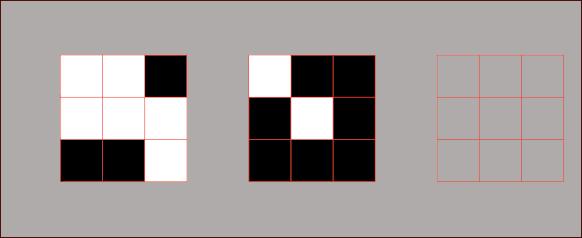

In [ ]:
from IPython.display import Image
Image(open('erosao.gif','rb').read())

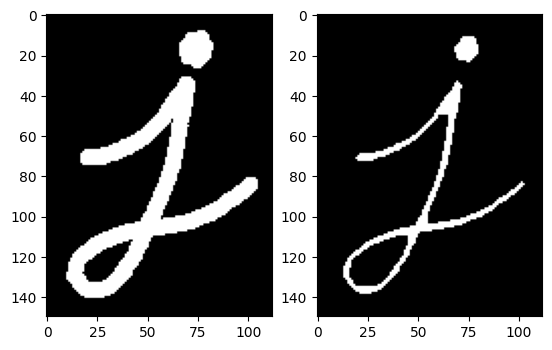

In [ ]:

img = cv2.imread('j.png',0)


dst = img.copy()
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))

erode = cv2.erode(img,kernel,iterations = 1)

plt.subplot(121),plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.subplot(122),plt.imshow(erode, cmap="gray", vmin=0, vmax=255)
plt.show()

#### <b>ABERTURA BINÁRIA</b>

A abertura em geral suaviza o contorno de uma imagem, quebra
estreitos e elimina proeminências delgadas, a operação de abertura e
usada também para remover ruídos da imagem.

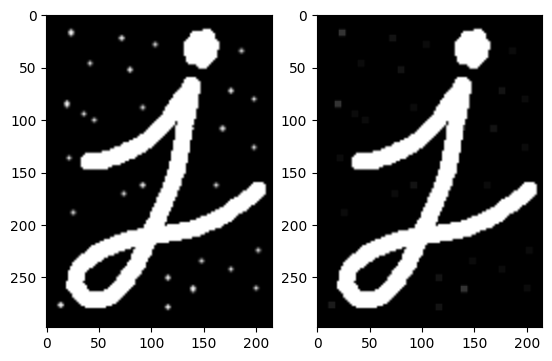

In [ ]:

img = cv.imread('j-noise.png',0)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))

opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)



plt.subplot(121),plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.subplot(122),plt.imshow(opening, cmap="gray", vmin=0, vmax=255)
plt.show()


#### <b>FECHAMENTO BINÁRIO</b>

O fechamento funde pequenos quebras e alargas golfos estreitos elimina
pequenos orifícios. Se uma abertura cria pequenos vazios na imagem, um
fechamento irá preencher ou fechar os vazios, estas operações podem
remover muitos dos pixels brancos com ruídos, ou seja basicamente ele e
igual a abertura só que primeiramente e feita a dilatação e após e feita a
erosão.

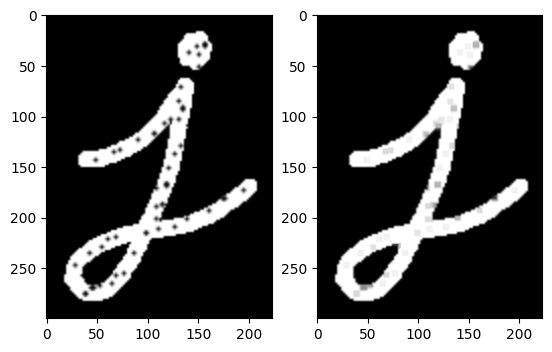

In [ ]:

img = cv2.imread('holes.png',0)


kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))

closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)


plt.subplot(121),plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.subplot(122),plt.imshow(closing, cmap="gray", vmin=0, vmax=255)
plt.show()

### DESAFIO 5

Utilizando a operação abertura e depois a operação de fechamento binário, é esperado que a imagem volte ao original? Por que?

In [ ]:
### seu código ###